In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

In [2]:
# Read the TSV files
train_df = pd.read_csv('../data/cyrillic-handwriting-dataset/train.tsv', sep='\t', header=None)
test_df = pd.read_csv('../data/cyrillic-handwriting-dataset/test.tsv', sep='\t', header=None)

train_df.columns = ["img_path", "text"]
test_df.columns = ["img_path", "text"]

# Display basic information about the datasets
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("Training set columns:", train_df.columns.tolist())


Training set shape: (72286, 2)
Test set shape: (1544, 2)
Training set columns: ['img_path', 'text']


## Image Analysis

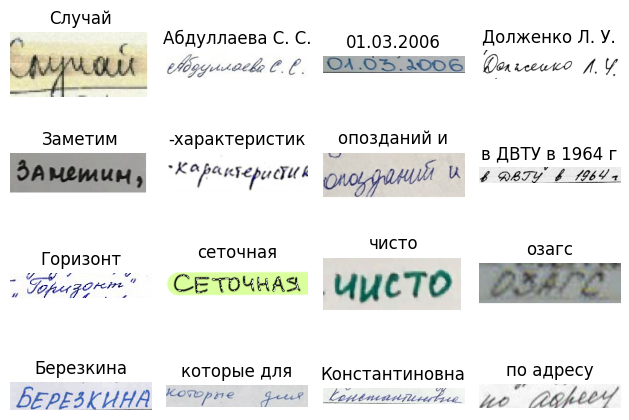

In [3]:
def display_random_images(df, split, n_images=16, n_cols=4):
    """
    Display random images from the dataset in a grid.
    
    Args:
        df: DataFrame containing image paths and text
        split: Dataset split ('train' or 'test')
        n_images: Number of images to display
        n_cols: Number of columns in the grid
    """
    # Calculate number of rows needed
    n_rows = (n_images + n_cols - 1) // n_cols
    
    # Create figure and axes
    fig, axes = plt.subplots(n_rows, n_cols)
    axes = axes.ravel()  # Flatten axes array for easier indexing
    
    # Get random sample of indices
    random_indices = np.random.choice(len(df), n_images, replace=False)
    
    # Display each image
    for idx, ax in enumerate(axes):
        if idx < n_images:
            # Get random image
            img_path = df.iloc[random_indices[idx]]['img_path']
            text = df.iloc[random_indices[idx]]['text']
            
            try:
                # Load and display image
                img = Image.open(f"../data/cyrillic-handwriting-dataset/{split}/{img_path}")
                ax.imshow(img, cmap='gray')
                ax.set_title(text)
                ax.axis('off')
            except Exception as e:
                ax.text(0.5, 0.5, f"Error loading image:\n{str(e)}", 
                       ha='center', va='center')
                ax.axis('off')
        else:
            ax.axis('off')  # Hide empty subplots
    
    plt.tight_layout()
    plt.show()

# Example usage:
display_random_images(test_df, "test", n_images=16, n_cols=4)

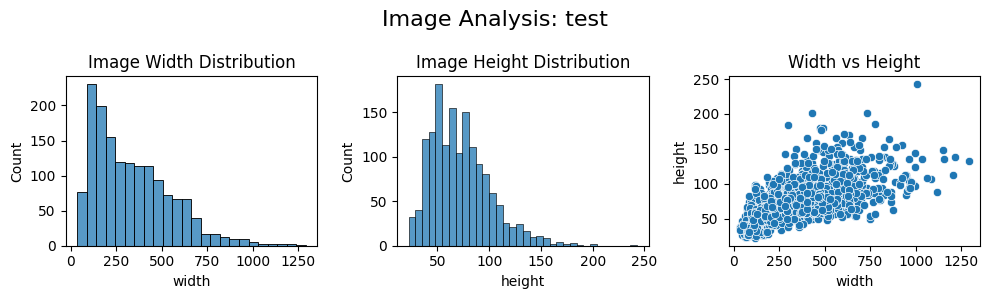

In [4]:
def analyze_image_characteristics(df, split):
    """Analyze basic image characteristics."""
    # You'll need to add: from PIL import Image
    image_sizes = []
    image_modes = []
    
    for img_path in df['img_path']:
        try:
            img = Image.open(f"../data/cyrillic-handwriting-dataset/{split}/{img_path}")
            image_sizes.append(img.size)
            image_modes.append(img.mode)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    
    # Convert to DataFrame for easier analysis
    size_df = pd.DataFrame(image_sizes, columns=['width', 'height'])
    
    # Create visualizations
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    
    # Plot 1: Width distribution
    sns.histplot(data=size_df['width'], ax=axes[0])
    axes[0].set_title('Image Width Distribution')
    
    # Plot 2: Height distribution
    sns.histplot(data=size_df['height'], ax=axes[1])
    axes[1].set_title('Image Height Distribution')
    
    # Plot 3: Width vs Height scatter
    sns.scatterplot(data=size_df, x='width', y='height', ax=axes[2])
    axes[2].set_title('Width vs Height')
    
    
    fig.suptitle(f"Image Analysis: {split}", fontsize=16)
    plt.tight_layout()
    plt.show()

analyze_image_characteristics(test_df, "test")

## Text Analysis

In [5]:
def plot_word_length_distribution(word_lengths, ax, split):
    """Plot distribution of word lengths."""
    sns.histplot(data=word_lengths, bins=30, ax=ax)
    ax.set_title(f'Distribution of Word Lengths: {split}')
    ax.set_xlabel('Word Length')
    ax.set_ylabel('Count')
    return ax


In [6]:
def plot_character_frequency(text_series, ax, title):
    """Plot top 20 most frequent characters."""
    all_chars = ''.join(text_series.astype(str))
    char_freq = Counter(all_chars)
    char_df = pd.DataFrame.from_dict(char_freq, orient='index', columns=['count'])
    char_df = char_df.sort_values('count', ascending=False).head(20)
    
    sns.barplot(x=char_df.index, y='count', data=char_df, ax=ax)
    ax.set_title(f'Top 20 Most Frequent Characters: {title}')
    ax.set_xlabel('Character')
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)
    return ax


In [7]:
def plot_word_length_boxplot(word_lengths, ax, split):
    """Plot word length statistics boxplot."""
    sns.boxplot(y=word_lengths, ax=ax)
    ax.set_title(f'Word Length Statistics: {split}')
    ax.set_ylabel('Word Length')
    return ax


In [8]:
def plot_character_type_distribution(text_series, ax, split):
    """Plot distribution of character types."""
    all_chars = ''.join(text_series.astype(str))
    char_types = {
        'Letters': sum(c.isalpha() for c in all_chars),
        'Digits': sum(c.isdigit() for c in all_chars),
        'Spaces': sum(c.isspace() for c in all_chars),
        'Punctuation': sum(not (c.isalpha() or c.isdigit() or c.isspace()) for c in all_chars)
    }
    
    char_types_df = pd.DataFrame.from_dict(char_types, orient='index', columns=['count'])
    sns.barplot(x=char_types_df.index, y='count', data=char_types_df, ax=ax)
    ax.set_title(f'Character Type Distribution: {split}')
    ax.set_xlabel('Character Type')
    ax.set_ylabel('Count')
    return ax


In [9]:
def print_df_analysis(df, split):
    word_lengths = df['text'].str.len()
    word_lengths = word_lengths.fillna(0).astype(np.uint8)

    print(f"{split} Dataset Statistics:")
    print(f"Average word length: {word_lengths.mean():.2f}")
    print(f"Median word length: {word_lengths.median():.2f}")
    print(f"Min word length: {word_lengths.min()}")
    print(f"Max word length: {word_lengths.max()}")
    print(f"Total number of unique characters: {len(Counter(''.join(df['text'].astype(str))))}")

print_df_analysis(train_df, "TRAIN")
print()
print_df_analysis(test_df, "TEST")

TRAIN Dataset Statistics:
Average word length: 7.47
Median word length: 7.00
Min word length: 0
Max word length: 40
Total number of unique characters: 109

TEST Dataset Statistics:
Average word length: 9.60
Median word length: 9.00
Min word length: 1
Max word length: 22
Total number of unique characters: 78


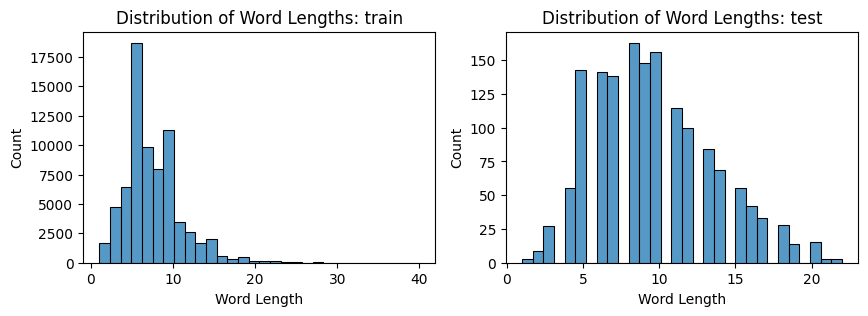

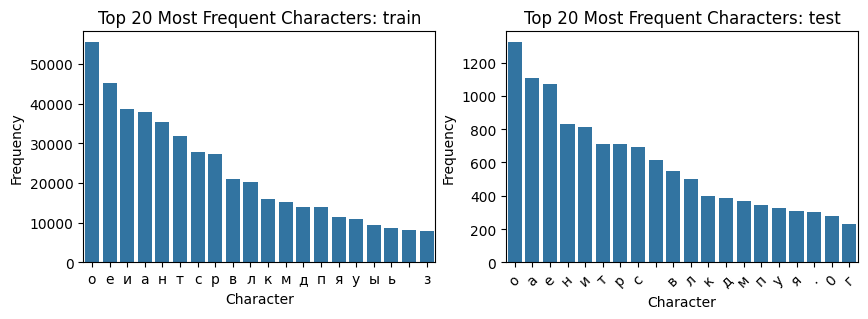

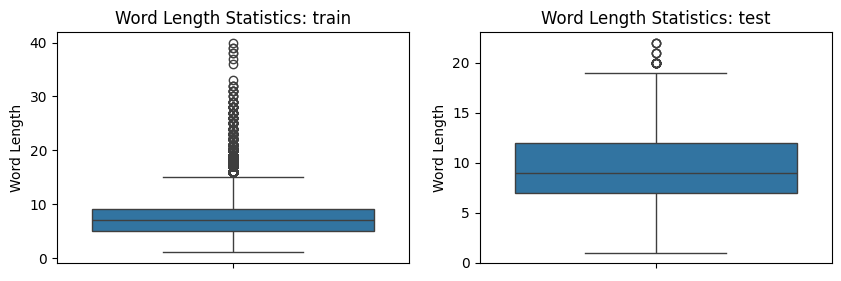

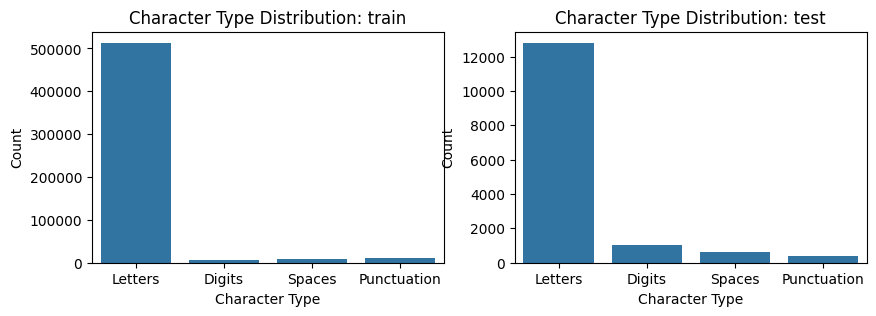

In [10]:
word_lengths_train = train_df['text'].str.len()
word_lengths_test = test_df['text'].str.len()



fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plot_word_length_distribution(word_lengths_train, axes[0], split="train")
plot_word_length_distribution(word_lengths_test, axes[1], split="test")
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plot_character_frequency(train_df["text"], axes[0], title="train")
plot_character_frequency(test_df["text"], axes[1], title="test")
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plot_word_length_boxplot(word_lengths_train, axes[0], split="train")
plot_word_length_boxplot(word_lengths_test, axes[1], split="test")
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plot_character_type_distribution(train_df["text"], axes[0], split="train")
plot_character_type_distribution(test_df['text'], axes[1], split="test")
plt.show()


In [11]:
def check_nan_values(df, split, output_file='nan_issues.txt'):
    """
    Check for NaN values in the dataset, print statistics, and save problematic entries to a file.
    
    Args:
        df: DataFrame to check
        title: Dataset title (e.g., 'TRAIN' or 'TEST')
        output_file: Path to the output file where issues will be saved
    """
    print(f"\n{split} Dataset NaN Check:")
    
    # Check for NaN values in each column
    nan_counts = df.isna().sum()
    total_rows = len(df)
    
    print(f"Total number of rows: {total_rows}")
    print("\nNaN values per column:")
    for column, count in nan_counts.items():
        percentage = (count / total_rows) * 100
        print(f"{column}: {count} NaN values ({percentage:.2f}%)")
    
    # Check for empty strings in text column
    empty_texts = (df['text'].str.strip() == '').sum()
    print(f"\nEmpty text entries: {empty_texts} ({empty_texts/total_rows*100:.2f}%)")
    
    # Check for whitespace-only entries
    whitespace_only = (df['text'].str.strip().str.len() == 0).sum()
    print(f"Whitespace-only entries: {whitespace_only} ({whitespace_only/total_rows*100:.2f}%)")
    
    # Save problematic entries to file
    with open(output_file, 'a') as f:
        f.write(f"\n{'='*50}\n")
        f.write(f"{split} Dataset Issues Report\n")
        f.write(f"{'='*50}\n\n")
        
        # Save NaN entries
        for column in df.columns:
            nan_indices = df[df[column].isna()].index
            if len(nan_indices) > 0:
                f.write(f"NaN values in column '{column}':\n")
                for idx in nan_indices:
                    f.write(f"Row {idx}: {df.loc[idx].to_dict()}\n")
                f.write("\n")
        
        # Save empty text entries
        empty_indices = df[df['text'].str.strip() == ''].index
        if len(empty_indices) > 0:
            f.write("Empty text entries:\n")
            for idx in empty_indices:
                f.write(f"Row {idx}: {df.loc[idx].to_dict()}\n")
            f.write("\n")
        
        # Save whitespace-only entries
        whitespace_indices = df[df['text'].str.strip().str.len() == 0].index
        if len(whitespace_indices) > 0:
            f.write("Whitespace-only entries:\n")
            for idx in whitespace_indices:
                f.write(f"Row {idx}: {df.loc[idx].to_dict()}\n")
            f.write("\n")
    
    return nan_counts

# Example usage:
nan_stats_train = check_nan_values(train_df, "TRAIN", 'nan_issues.txt')
nan_stats_test = check_nan_values(test_df, "TEST", 'nan_issues.txt')


TRAIN Dataset NaN Check:
Total number of rows: 72286

NaN values per column:
img_path: 0 NaN values (0.00%)
text: 2 NaN values (0.00%)

Empty text entries: 0 (0.00%)
Whitespace-only entries: 0 (0.00%)

TEST Dataset NaN Check:
Total number of rows: 1544

NaN values per column:
img_path: 0 NaN values (0.00%)
text: 0 NaN values (0.00%)

Empty text entries: 0 (0.00%)
Whitespace-only entries: 0 (0.00%)
